<a href="https://colab.research.google.com/github/SantiagoM1227/IIT-2022-I/blob/main/LL_avance_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
#init
from matplotlib import pyplot as pl 
import numpy as np
from numpy.linalg import eig
import math as math

#tweaks
a=1
pi = np.pi
I = 0+1j
N = 50 #Matrix truncation
G = 30 #should be less than N
C = 2*G
D = -I*G/pi


AttributeError: ignored

In [171]:
#plots
def plotenergies(E,x_lim,y_lim):
  E = np.real(E)
  l = len(E)
  Energy = np.sort(E)
  x=np.linspace(1,l,l)
  pl.xlabel("Eigenvalue Number") 
  pl.ylabel("Energies") 
  pl.xlim([0, x_lim])
  pl.ylim([0, y_lim])
  pl.scatter(x,Energy) 
  pl.show()
def plotdensities(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi = eigenstates(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()
def plotdensities_Mobius(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Mobius = eigenstates_Mobius(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi_Mobius)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()
def plotdensities_Cylinder(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Cylinder = eigenstates_Cylinder(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi_Cylinder)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()


In [ ]:
#square

#Auxiliary functions
def g_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  return value

def g_e(n,nn):
  if (n+nn)%2==0:
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  else: 
    value = 0
  return value

def f_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    num = n*nn
    den = n**2-nn**2
    value = num/den
  return value

In [ ]:
#4D hamiltonian matrix elements
def H_n_nn_m_mm(n,nn,m,mm):
    if mm==m:
        if nn==n:
            element = (n**2)+(m**2)+((G**2)/2)*((1/3)-((1/(pi*n))**2)-((1/(pi*m)**2)))
        else: 
            element = 2*(G/pi)**2*(g_e(n,nn))
    else: 
        if n==nn:
            element = 2*(G/pi)**2*(g_e(m,mm))
        else:
            element = -I*(16*G/(pi**3))*(g_o(n,nn)*f_o(m,mm)-g_o(m,mm)*f_o(n,nn))
    return element

H_n_nn_m_mm(1,1,1,1)

60.810934721896

In [ ]:
#4D NxNxNxN matrix to 2D NxN matrix of 2D NxN matrices  N is the precission
def H_m_mm_Matrix(m,mm,N):
  H_block = np.zeros((N,N),dtype=complex)
  if m==mm:
    for n in range(N):
      H_block[n][n] = H_n_nn_m_mm(n+1,n+1,m+1,mm+1)
      for nn in range (N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  else: 
    for n in range(N):
      for nn in range(N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  return H_block

In [ ]:
#Break blocks
def H_matrix(N):
    Zero = np.zeros((N,N),dtype = complex)
    H = [[Zero for _ in range(N)] for _ in range(N)] #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H[m][m] = H_m_mm_Matrix(m,m,N) #diagonal 
      for mm in range(m+1,N):
        H[m][mm] = H_m_mm_Matrix(m,mm,N) #upper triangle
    H = np.matrix(np.block(H)) #from block to matrix
    H_final = np.triu(H)+ np.tril(np.conj(H.T),-1) #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [ ]:
def eigenstates(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = np.array([np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range (N)])
            Psi_x = np.array([np.sqrt(2)*np.sin((t+1)*pi*x[j]) for t in range (N)])
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out


In [ ]:
#calculate
H = H_matrix(N)

[[  60.81093472+0.00000000e+00j    0.        +0.00000000e+00j
    34.19589948+0.00000000e+00j ...    0.        +8.79424449e-07j
     0.        +0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j   98.0068342 +0.00000000e+00j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
     0.        +8.62540075e-07j    0.        +0.00000000e+00j]
 [  34.19589948+0.00000000e+00j    0.        +0.00000000e+00j
   109.33940818+0.00000000e+00j ...    0.        +2.76513527e-06j
     0.        +0.00000000e+00j    0.        +9.58788671e-08j]
 ...
 [   0.        -8.79424449e-07j    0.        +0.00000000e+00j
     0.        -2.76513527e-06j ... 4953.96197289+0.00000000e+00j
     0.        +0.00000000e+00j   45.57554283+0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.        -8.62540075e-07j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
  5050.96277238+0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.   

In [ ]:
#solve matrix
E, V = eig(H)

In [ ]:
index = np.argsort(np.real(E))
print(index)

[423 425 470 ...   1   0   2]


In [ ]:
C = V[:,index]

In [ ]:
A = (C[:,1])
print(C[:,1],np.size(2))

[-1.41818563e-06-1.83940199e-08j -3.63776424e-01-1.82936717e-09j
  4.67695628e-07-2.80244609e-07j ...  2.56311227e-16-4.14963106e-16j
  2.49897658e-17-4.47649818e-11j  1.78471051e-16-2.58157671e-16j] 1


In [ ]:
D = np.sort(E)

In [ ]:
print(D[470])

(631.9264043334526+5.375259817632014e-14j)


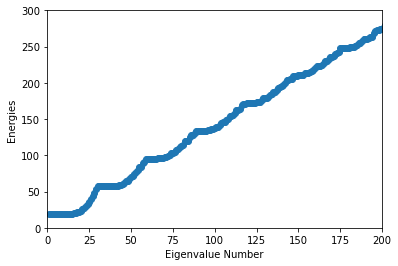

In [ ]:
#print & plot
plotenergies(D,200,300)

In [ ]:
plotdensities(C,N,200,0)

NameError: name 'eigenstates' is not defined

In [40]:
#auxiliary functions
def oscMOB(m,mm):
  if m==mm:
    out = 1/3
  else: 
    num = 2-I*(m-mm)*pi
    den = ((m-mm)**2)*(pi**2)
    out = num/den
  return out
def angMOB(m, mm,n,nn):
  if (nn+n)%2==0:
    out = 0
  else: 
    if m == mm:
      num = -2*(n*nn)
      den = (n**2-nn**2)
      out = num/den
    else: 
      num = 4*(n*nn)*(2+I*pi*(mm-m))
      den = (n**2-nn**2)*((m-mm)**2)*pi**2
      out = num/den
  return out

In [103]:
#Möbius Hamiltonian matrix elements
def Mobius_H(k,l): #k,l indices of N*N X N*N matrix
    m=k//N -(N//2) # also negative indices
    n=(2*(k%N))+((m+1)%2)  #|m,n>
    if n%2==0:
      n = n+2
    mm=l//N -(N//2) 
    nn=(2*(l%N))+((mm+1)%2) #<mm,nn|
    if nn%2==0:
      nn = nn+2
    if n==nn:
      element = 4*G**2*oscMOB(m,mm)
      if m==mm:
        element = element + m**2+n**2
    else:
      element = I*(4*G/np.pi)*angMOB(m,mm,n,nn)
    return element

In [104]:
def H_Mobius_Matrix(N):
  H_Mobius = np.zeros((N*N,N*N),dtype=complex)
  for k in range(N*N):
    for l in range(0,k+1):
      H_Mobius[k,l]= Mobius_H(k,l)
  for k in range(N*N):
    for l in range(k+1,N*N):
      H_Mobius[k,l]= np.conj(H_Mobius[l,k])
  return H_Mobius

In [ ]:
#Break blocks for Möbius Matrix
def H_Mmm(N):
    Zero = np.zeros((N,N),dtype = complex)
    H_Mobius = [[Zero for _ in range(N)] for _ in range(N)] #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H_Mobius[m][m] = H_m_mm_Mobius_Matrix(m,m,N) #diagonal 
      for mm in range(m+1,N):
        H_Mobius[m][mm] = H_m_mm_Mobius_Matrix(m,mm,N) #upper triangle
    H_Mobius = np.matrix(np.block(H_Mobius)) #from block to matrix
    H_final = np.triu(H_Mobius)+ np.tril(np.conj(H_Mobius.T),-1) #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [102]:
for k in range(N*N):
    m=k//N -(N//2) # also negative indices
    n=(2*(k%N))+((m+1)%2)  #|m,n>
    
    print(m,n)

-25 2
-25 4
-25 6
-25 8
-25 10
-25 12
-25 14
-25 16
-25 18
-25 20
-25 22
-25 24
-25 26
-25 28
-25 30
-25 32
-25 34
-25 36
-25 38
-25 40
-25 42
-25 44
-25 46
-25 48
-25 50
-25 52
-25 54
-25 56
-25 58
-25 60
-25 62
-25 64
-25 66
-25 68
-25 70
-25 72
-25 74
-25 76
-25 78
-25 80
-25 82
-25 84
-25 86
-25 88
-25 90
-25 92
-25 94
-25 96
-25 98
-25 100
-24 1
-24 3
-24 5
-24 7
-24 9
-24 11
-24 13
-24 15
-24 17
-24 19
-24 21
-24 23
-24 25
-24 27
-24 29
-24 31
-24 33
-24 35
-24 37
-24 39
-24 41
-24 43
-24 45
-24 47
-24 49
-24 51
-24 53
-24 55
-24 57
-24 59
-24 61
-24 63
-24 65
-24 67
-24 69
-24 71
-24 73
-24 75
-24 77
-24 79
-24 81
-24 83
-24 85
-24 87
-24 89
-24 91
-24 93
-24 95
-24 97
-24 99
-23 2
-23 4
-23 6
-23 8
-23 10
-23 12
-23 14
-23 16
-23 18
-23 20
-23 22
-23 24
-23 26
-23 28
-23 30
-23 32
-23 34
-23 36
-23 38
-23 40
-23 42
-23 44
-23 46
-23 48
-23 50
-23 52
-23 54
-23 56
-23 58
-23 60
-23 62
-23 64
-23 66
-23 68
-23 70
-23 72
-23 74
-23 76
-23 78
-23 80
-23 82
-23 84
-23 86
-23 88
-23 

In [105]:
H_Mobius = H_Mobius_Matrix(N)

In [84]:
print(H_Mobius,H_Mobius[1550,420])

[[1.82500000e+03+0.j         0.00000000e+00-0.j
  0.00000000e+00-0.j         ... 0.00000000e+00-0.j
  0.00000000e+00-0.j         0.00000000e+00-0.j        ]
 [0.00000000e+00+0.j         1.82900000e+03+0.j
  0.00000000e+00-0.j         ... 2.09047188e-02-0.0002716j
  2.04733232e-02-0.00026599j 2.00593795e-02-0.00026062j]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  1.84100000e+03+0.j         ... 4.18651278e-02-0.00054392j
  4.09989576e-02-0.00053267j 4.01679593e-02-0.00052187j]
 ...
 [0.00000000e+00+0.j         2.09047188e-02+0.0002716j
  4.18651278e-02+0.00054392j ... 1.08010000e+04+0.j
  0.00000000e+00-0.j         0.00000000e+00-0.j        ]
 [0.00000000e+00+0.j         2.04733232e-02+0.00026599j
  4.09989576e-02+0.00053267j ... 0.00000000e+00+0.j
  1.11850000e+04+0.j         0.00000000e+00-0.j        ]
 [0.00000000e+00+0.j         2.00593795e-02+0.00026062j
  4.01679593e-02+0.00052187j ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         1.15770000e+04+0.j        ]] (-0.0528962864

In [106]:
#Verify Hermiticity
H_Mobius-np.conj(H_Mobius.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [107]:
#solve matrix 
E_Mobius, V_Mobius = eig(H_Mobius)

In [140]:
print(E_Mobius) 

[24228.19082557-1.40795530e-12j 23597.69247058+4.66933998e-13j
 23611.94057269-1.02175330e-12j ...   594.81990765+1.12398123e-13j
   556.76654552-5.51105208e-14j   595.41857428-2.15521832e-13j]


In [141]:
EE = np.sort(np.real(E_Mobius))
print(EE)

[1.90985932e+01 1.90985932e+01 1.90985934e+01 ... 2.35976925e+04
 2.36119406e+04 2.42281908e+04]


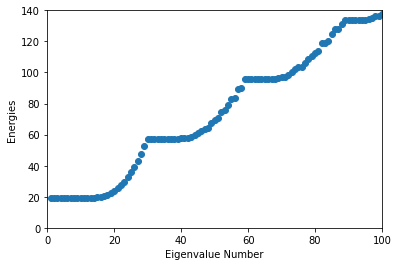

In [142]:
#print & plot
plotenergies(EE,100,140) 

In [156]:
def oddonly(Matrix):
    N = np.size(Matrix,1)
    MMatrix = np.zeros([N,2*N], dtype = complex)
    for i in range(N):
        for j in range(N):
            if i%2==0:
                MMatrix[i,2*j+1] = Matrix[i,j]
            else:
                MMatrix[i,2*j] = Matrix[i,j]
    return MMatrix

In [162]:
#test 
R = np.random.randint(10, size = (3,3) )
R[R==0] = 1
print(R)
OV = oddonly(R)
print(OV)

[[1 3 6]
 [4 2 7]
 [5 5 7]]
[[0.+0.j 1.+0.j 0.+0.j 3.+0.j 0.+0.j 6.+0.j]
 [4.+0.j 0.+0.j 2.+0.j 0.+0.j 7.+0.j 0.+0.j]
 [0.+0.j 5.+0.j 0.+0.j 5.+0.j 0.+0.j 7.+0.j]]


In [ ]:
Psi_yy = [np.sqrt(2)*np.sin((t+1)*pi*0.5) for t in range(2*N)]
print(np.size(Psi_yy))

100


In [157]:
def eigenstates_Mobius(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex)
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    MMatrix = oddonly(Matrix) # only linear combinations of odd-summing indices
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(2*N)]
            Psi_x = [np.cos((t-N//2)*pi*x[j])+np.sin((t-N//2)*pi*x[j])*I for t in range(N)] #account for negative states
            A = np.matmul(MMatrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [143]:
index = np.argsort(EE)
print(index)

[   0    1    2 ... 2497 2498 2499]


In [144]:
C_Mobius = V_Mobius[:,index]

In [153]:
print(C_Mobius[:,3],np.size(C_Mobius[:,2]))

[-2.88982502e-07-8.62808870e-08j -5.78966284e-07-1.72850618e-07j
 -8.70966600e-07-2.60001934e-07j ... -2.40940899e-02-2.64144476e-02j
 -8.68714661e-03-1.05718035e-02j -6.80946539e-03-8.00308399e-03j] 2500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


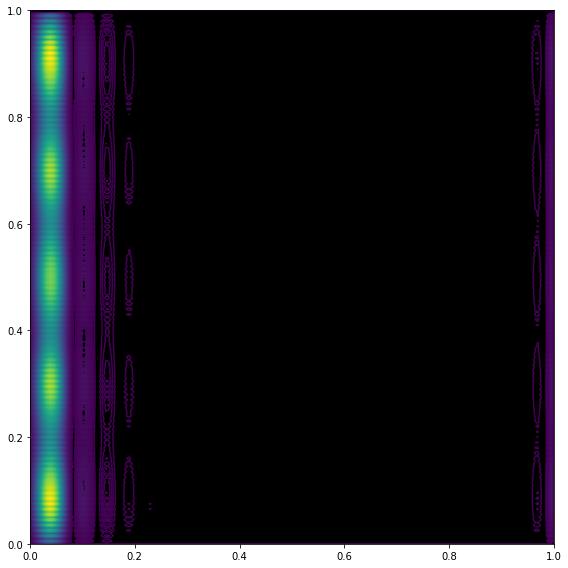

In [173]:
plotdensities_Mobius(C_Mobius,N,200,10)

In [ ]:
def oscCYL(m,mm):
  Constant = 2*(G**2)/(pi**2)
  num = (1-I*(m-mm)*pi)
  den = (m-mm)**2
  out = Constant*(num/den)
  return out

def Cyl_O(n,nn): #only odd contributions
  if (n+nn)%2==1:
    num = -(8*G/(pi**2))*n*nn
    den = (n**2-nn**2)
    out = num/den
  else: 
    out = 0
  return out

In [ ]:
 #4D  Möbius Hamiltonian matrix elements
def Cylinder_H_n_nn_m_mm(n,nn,m,mm):
    if mm==m:
        if nn==n:
            element = (n**2)+((2*m)**2)+(4/3)*(G**2)
        else: 
            element = Cyl_O(n,nn)*I
    else: 
        if n==nn:
            element = oscCYL(m,mm)
        else:
            element = Cyl_O(n,nn)*(1/(m-mm))
    return element

In [ ]:
#4D NxNxNxN matrix to 2D NxN matrix of 2D NxN matrices  N is the precission
#n-nn position is occupied by an even or odd number given by the parity of m and mm
def H_m_mm_Cylinder_Matrix(m,mm,N):
  H_block = np.zeros((N,N),dtype=complex)
  if m==mm:
    for n in range(N):
      H_block[n][n] = Cylinder_H_n_nn_m_mm(n+1,n+1,m+1,mm+1)
      for nn in range (N):
        H_block[n][nn] = Cylinder_H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  else: 
    for n in range(N):
      for nn in range(N):
        H_block[n][nn] = Cylinder_H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  return H_block

In [ ]:
#Break blocks for Möbius Matrix
def H_Cylinder_matrix(N):
    Zero = np.zeros((N,N),dtype = complex)
    H = [[Zero for _ in range(N)] for _ in range(N)] 
    #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H[m][m] = H_m_mm_Cylinder_Matrix(m,m,N) 
      #diagonal 
      for mm in range(m+1,N):
        H[m][mm] = H_m_mm_Cylinder_Matrix(m,mm,N) 
        #upper triangle
    H = np.matrix(np.block(H)) 
    #from block to matrix
    H_final = np.triu(H)+ np.tril(np.conj(H.T),-1) 
    #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [ ]:
H_Cylinder = H_Cylinder_matrix(N)

[[ 1.20500000e+03  +0.j          0.00000000e+00 +16.21138938j
   0.00000000e+00  +0.j         ... -1.03433856e-02  +0.j
   0.00000000e+00  +0.j         -9.92931216e-03  +0.j        ]
 [ 0.00000000e+00 -16.21138938j  1.20800000e+03  +0.j
   0.00000000e+00 +29.18050089j ...  0.00000000e+00  +0.j
  -2.02895987e-02  +0.j          0.00000000e+00  +0.j        ]
 [ 0.00000000e+00  +0.j          0.00000000e+00 -29.18050089j
   1.21300000e+03  +0.j         ... -3.11383229e-02  +0.j
   0.00000000e+00  +0.j         -2.98836023e-02  +0.j        ]
 ...
 [-1.03433856e-02  +0.j          0.00000000e+00  +0.j
  -3.11383229e-02  +0.j         ...  1.35040000e+04  +0.j
   0.00000000e+00+589.6266159j   0.00000000e+00  +0.j        ]
 [ 0.00000000e+00  +0.j         -2.02895987e-02  +0.j
   0.00000000e+00  +0.j         ...  0.00000000e+00-589.6266159j
   1.36010000e+04  +0.j          0.00000000e+00+601.78642406j]
 [-9.92931216e-03  +0.j          0.00000000e+00  +0.j
  -2.98836023e-02  +0.j         ...  0.0000

In [ ]:
H_Cylinder-np.conj(H_Cylinder.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
#solve matrix
E_Cylinder, V_Cylinder = eig(H_Cylinder)
print(E_Cylinder)

[17325.12934337-1.25445251e-12j 17016.47483444-2.80310653e-13j
 16720.76038469+7.60219209e-14j ...  3142.82526739+4.53981999e-13j
  3144.27022938-2.63314121e-13j  3145.38925345+6.14925826e-14j]


In [ ]:
EE_Cylinder = np.real(E_Cylinder)
print(EE_Cylinder)

[17325.12934337 17016.47483444 16720.76038469 ...  3142.82526739
  3144.27022938  3145.38925345]


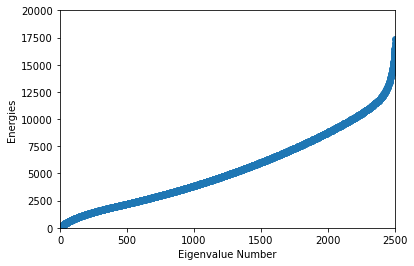

In [ ]:
#print & plot
plotenergies(EE_Cylinder,2500,20000) 

In [ ]:
def eigenstates_Cylinder(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(N)]
            Psi_x = [np.cos(2*(t+1)*pi*y[k])+np.sin(2*(t+1)*pi*y[k])*I for t in range(N)]
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [ ]:
index_Cylinder = np.argsort(np.real(E_Cylinder))
print(index_Cylinder)

[203 204 205 ...   2   1   0]


In [ ]:
C_Cylinder = V_Cylinder[:,index]

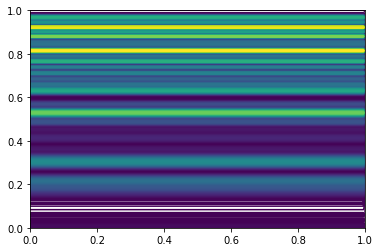

In [ ]:
plotdensities_Cylinder(C_Cylinder,N,200,0)